In [1]:
import matplotlib.pyplot as plt
import utils
import numerical_hysteresis
import synthetic
import optimization
import torch, botorch
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv(r"C:\Users\dubey\Documents\3. Projects\Accelerator-Research\Hysteresis-Data.csv", engine='python')

print(data)

    Current  B-fld
0     186.0  0.237
1     184.0  0.236
2     183.0  0.235
3     181.0  0.234
4     180.0  0.234
5     179.0  0.233
6     177.0  0.232
7     176.0  0.231
8     175.0  0.231
9     176.0  0.231
10    177.0  0.232
11    179.0  0.233
12    180.0  0.234
13    181.0  0.234
14    183.0  0.235
15    184.0  0.236
16    186.0  0.237
17    187.0  0.237
18    188.0  0.238
19    190.0  0.239
20    191.0  0.240
21    193.0  0.241
22    194.0  0.242
23    195.0  0.243
24    197.0  0.244
25    195.0  0.243
26    194.0  0.242
27    193.0  0.241
28    191.0  0.241
29    190.0  0.240
30    188.0  0.239
31    187.0  0.238
32    186.0  0.237


In [3]:
# Global parameters
n = 50
h = torch.tensor(data['Current'])
b = torch.tensor(data['B-fld'])

h_min = 170
h_max = 200
b_min = 0
b_max = 0.5

xx, yy=utils.generate_asym_mesh(h_min, h_max, n)

states=numerical_hysteresis.state(xx, yy, h_max, h)

alpha = 100
num_iterations = 1000

C:\Users\dubey\Documents\GitHub\bayesian_hysteresis\numerical_hysteresis.py:52: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  hs = torch.cat((torch.tensor([-h_sat]), torch.tensor(h)))  # H_0=-t, negative saturation limit


In [4]:
h_nd = botorch.utils.transforms.normalize(h, torch.tensor([h_min, h_max]))
b_nd = botorch.utils.transforms.normalize(b, torch.tensor([b_min, b_max]))

In [12]:
# plotting 

def plot_lfunc(loss):
    print(f"Loss function converges to {loss[-1]}")
    fig_lf = plt.figure()
    plt.plot(loss)
    plt.title('Optimization Path')
    plt.xlabel('Iterations')
    plt.ylabel('Loss')
    
def plot_density(x, xx, yy, n):
#     fig_dens = plt.figure()
    mat = utils.vector_to_tril(x, n)
    plt.pcolor(xx, yy, mat)
    plt.colorbar()
    
def plot_loops(h, m, m_pred, m_start):
    fig_loops = plt.figure()
#     plt.plot(h, m, 'o')
    plt.plot(h, m_pred)
    plt.plot(h, m_start)
    plt.title('Magnetic Hysteresis Loops')
    plt.xlabel('Applied Magnetic Field, $H$')
    plt.ylabel('Resulting Magnetization, $M$')

In [6]:
history_f, x_star, num_points, h, b, b_pred, b_start = optimization.optimize(n, h_nd, b_nd, h_max, 
                                                                             b_max, optimization.l, alpha, num_iterations)

0 iterations completed
500 iterations completed


Loss function converges to 0.0019321102490388136


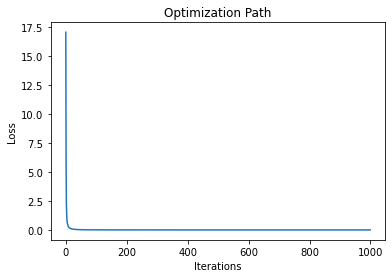

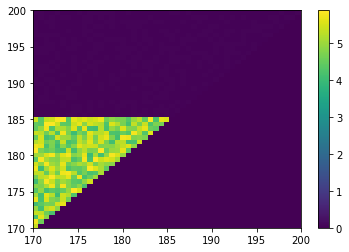

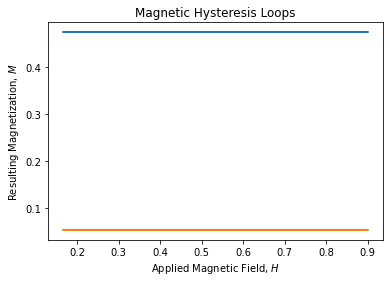

In [13]:
# Plot the trajectory of the loss function
plot_lfunc(history_f)
plt.show()

# Plot optimized hysterion density distribution
plot_density(x_star, xx, yy, num_points)
plt.show()

# Plot H x M hysteresis loop
plot_loops(h, b, b_pred, b_start)
plt.show()

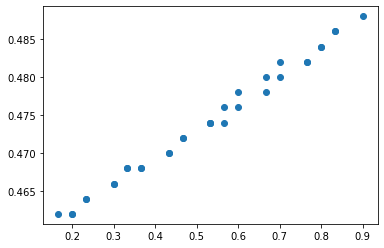

In [8]:
plt.plot(h_nd, b_nd, 'o')

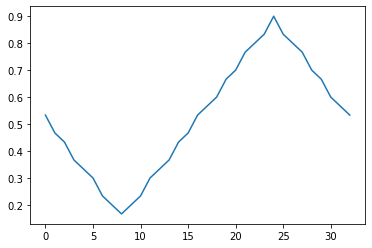

In [9]:
plt.plot(h_nd)

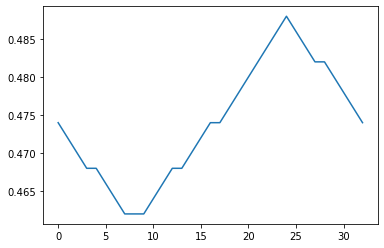

In [10]:
plt.plot(b_nd)